In [187]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
%matplotlib inline

data_train = pd.read_csv('train.csv')
y = data_train.pop('Survived')
data_test = pd.read_csv('test.csv')



In [188]:
data_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
data_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

Learning about data

For the bariables:
   <li> Is it categorical
   <li> max and min average
   <li> what are the categories
   <li> Missing values?
   <li> Distribution



In [169]:
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

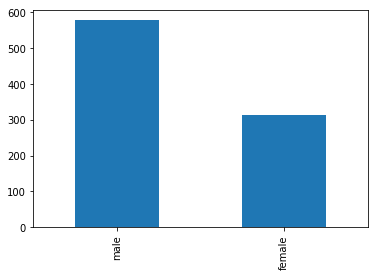

In [170]:
data_train.Sex.value_counts().plot(kind = 'bar')

In [171]:
data_train[data_train.Sex.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [172]:
data_train.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [173]:
data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

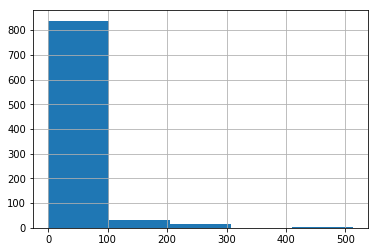

In [174]:
data_train.Fare.hist(bins=5)

In [175]:
data_train[data_train.Fare == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Handling Missing Age...

Strategies
<li> Drop the ones missing
<li> Set them to Zero for continuous variable. For categorical, create new category
<li> Use some average value
<li> Create an ml algorithm to predict the value!

In [176]:
avgAge = data_train.Age.mean()
data_train.Age = data_train.Age.fillna(value=avgAge)
data_test.Age = data_test.Age.fillna(value=avgAge)


In [177]:
data_train[data_train.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Doing some fitting
Going to try and fit the model

In [178]:
numeric_variables = list(data_train.dtypes[data_train.dtypes != "object"].index)
data_train[numeric_variables].describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [179]:
model = RandomForestRegressor(n_estimators=1000,oob_score=True, random_state=42)
model.fit(data_train[numeric_variables],y)

model.oob_score_


0.15348314246562722

### Now for Categorical

Going to do some Categorical Stuff

In [180]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'category']].describe().to_html()))

In [181]:
data_test.shape

(418, 11)

In [182]:
data_train.drop(["Name","Ticket","PassengerId"], axis=1, inplace=True)
data_test.drop(["Name","Ticket","PassengerId"], axis=1, inplace=True)

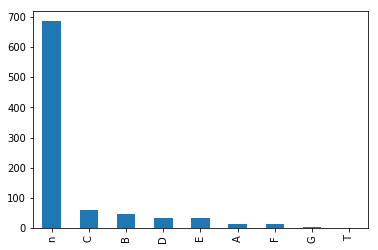

In [183]:
char_cabin = data_train['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin)
data_train['Cabin'] = new_cabin

char_cabin2 = data_test['Cabin'].astype(str)
new_cabin2 = np.array([cabin[0] for cabin in char_cabin2])
new_cabin2 = pd.Categorical(new_cabin2)
data_test['Cabin'] = new_cabin

data_test.Cabin.value_counts().plot(kind = 'bar')

In [184]:
data_train = pd.get_dummies(data_train, prefix='is_')
data_test = pd.get_dummies(data_test, prefix='is_')



KeyError: ValueError('Shape of passed values is (3, 891), indices imply (3, 418)',)

In [ ]:
model2 = RandomForestRegressor(n_estimators=1000,oob_score=True, random_state=42)
model2.fit(data_train,y)


In [ ]:
model2.oob_score_

In [ ]:
data_test.